In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

Cloning into 'ML-datasets'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 194 (delta 33), reused 124 (delta 24), pack-reused 60
Receiving objects: 100% (194/194), 35.45 MiB | 19.04 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
drinks=pd.read_csv('ML-datasets/drinks.csv')

# Wstępne zapoznanie ze zbiorem danych

In [ ]:
drinks.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [ ]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [ ]:
drinks['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', "Cote d'Ivoire",
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'North Korea', 'DR Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana',

In [ ]:
drinks['country'].count()

193

In [ ]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


# Przetwarzanie, analiza i wizualizacja zbioru danych

In [ ]:
drinks_eu=drinks[drinks['continent'].isin(['EU'])]

In [ ]:
drinks_eu.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_alcohol
1,Albania,89,132,54,4.9,EU,0
3,Andorra,245,138,312,12.4,EU,0
7,Armenia,21,179,11,3.8,EU,0
9,Austria,279,75,191,9.7,EU,0
10,Azerbaijan,21,46,5,1.3,EU,0
15,Belarus,142,373,42,14.4,EU,0
16,Belgium,295,84,212,10.5,EU,0
21,Bosnia-Herzegovina,76,173,8,4.6,EU,0
25,Bulgaria,231,252,94,10.3,EU,0
42,Croatia,230,87,254,10.2,EU,0


In [ ]:
drinks_eu['total_alcohol']=drinks_eu['beer_servings']+drinks_eu['spirit_servings']+drinks_eu['wine_servings']

<ipython-input-110-8ef6b772fd56>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
drinks_eu.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_alcohol
1,Albania,89,132,54,4.9,EU,275
3,Andorra,245,138,312,12.4,EU,695
7,Armenia,21,179,11,3.8,EU,211
9,Austria,279,75,191,9.7,EU,545
10,Azerbaijan,21,46,5,1.3,EU,72


In [ ]:
top_drinkers_eu=drinks_eu.sort_values('total_alcohol', ascending=False)

In [ ]:
top_drinkers_eu_total_litres=drinks_eu.sort_values('total_litres_of_pure_alcohol', ascending=False)

In [ ]:
top_drinkers_eu=top_drinkers_eu.iloc[:10, :]

In [ ]:
top_drinkers_eu_total_litres=top_drinkers_eu_total_litres.iloc[:10, :]

In [ ]:
top_drinkers_eu

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_alcohol
3,Andorra,245,138,312,12.4,EU,695
45,Czech Republic,361,170,134,11.8,EU,665
61,France,127,151,370,11.8,EU,648
98,Lithuania,343,244,56,12.9,EU,643
99,Luxembourg,236,133,271,11.4,EU,640
65,Germany,346,117,175,11.3,EU,638
75,Hungary,234,215,185,11.3,EU,634
135,Poland,343,215,56,10.9,EU,614
155,Slovakia,196,293,116,11.4,EU,605
136,Portugal,194,67,339,11.0,EU,600


In [ ]:
top_drinkers_eu_total_litres

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_alcohol
15,Belarus,142,373,42,14.4,EU,557
98,Lithuania,343,244,56,12.9,EU,643
3,Andorra,245,138,312,12.4,EU,695
45,Czech Republic,361,170,134,11.8,EU,665
61,France,127,151,370,11.8,EU,648
155,Slovakia,196,293,116,11.4,EU,605
99,Luxembourg,236,133,271,11.4,EU,640
81,Ireland,313,118,165,11.4,EU,596
65,Germany,346,117,175,11.3,EU,638
75,Hungary,234,215,185,11.3,EU,634


In [ ]:
px.bar(data_frame=top_drinkers_eu, x='total_alcohol', y='country', title='Suma alkoholu', text_auto='True', color='total_alcohol')

In [ ]:
top_drinkers_eu=top_drinkers_eu.reset_index()

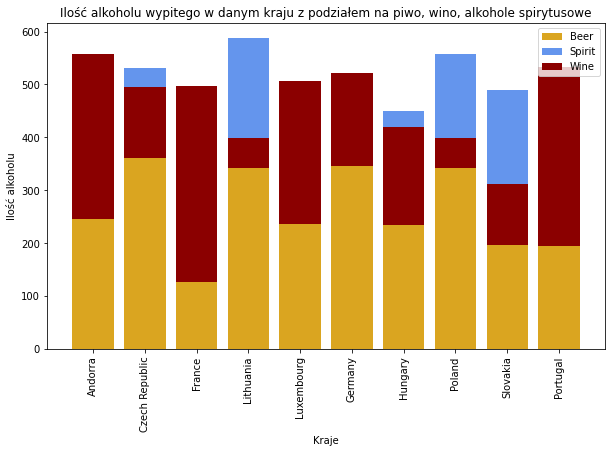

In [ ]:
fig, ax=plt.subplots(figsize=(10,6))
ax1 = ax.bar(top_drinkers_eu.country, top_drinkers_eu['beer_servings'], label="Beer", color='goldenrod')
ax2 = ax.bar(top_drinkers_eu.country, top_drinkers_eu['spirit_servings'], bottom=top_drinkers_eu['beer_servings'], label="Spirit", color='cornflowerblue')
ax3 = ax.bar(top_drinkers_eu.country, top_drinkers_eu['wine_servings'], bottom=top_drinkers_eu['beer_servings'], label="Wine", color='darkred')

ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Ilość alkoholu')
ax.set_xlabel('Kraje')
ax.set_title("Ilość alkoholu wypitego w danym kraju z podziałem na piwo, wino, alkohole spirytusowe")

ax.legend()
plt.show()

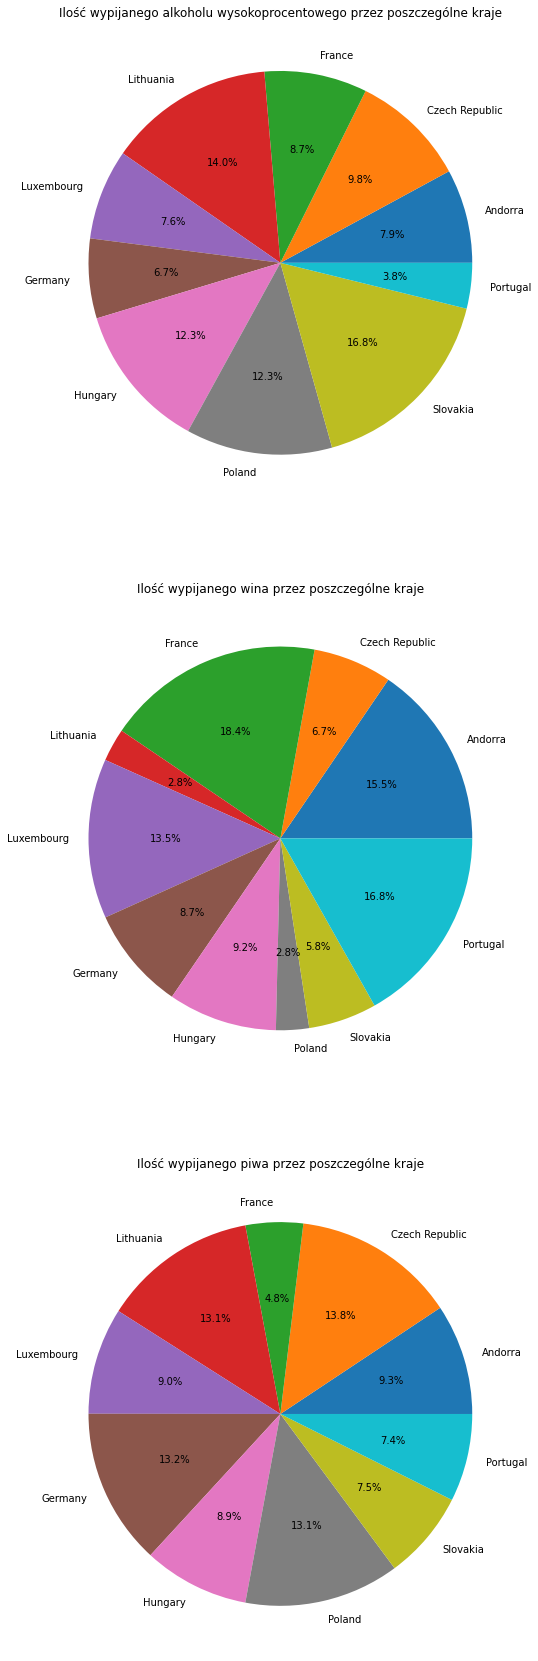

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
ax[0].pie(top_drinkers_eu['spirit_servings'], labels=top_drinkers_eu['country'], autopct='%1.1f%%')
ax[0].set_title("Ilość wypijanego alkoholu wysokoprocentowego przez poszczególne kraje")

ax[1].pie(top_drinkers_eu['wine_servings'], labels=top_drinkers_eu['country'], autopct='%1.1f%%')
ax[1].set_title("Ilość wypijanego wina przez poszczególne kraje")
ax[2].pie(top_drinkers_eu['beer_servings'], labels=top_drinkers_eu['country'], autopct='%1.1f%%')
ax[2].set_title("Ilość wypijanego piwa przez poszczególne kraje")
plt.show()

In [ ]:
top_drinkers_eu=top_drinkers_eu.iloc[:10,1:]

In [ ]:
count_corr=top_drinkers_eu.corr()

<AxesSubplot:>

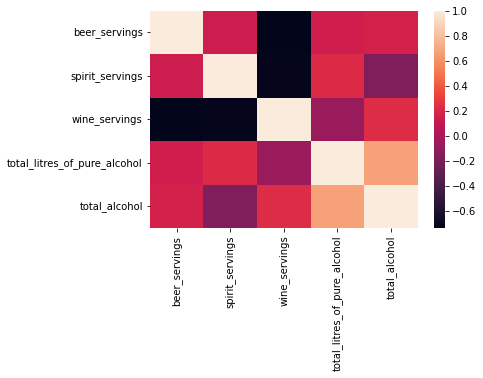

In [ ]:
sns.heatmap(count_corr)